In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tmdbsimple as tmdb
import os
import pickle

In [9]:
with open('../Data/api_key.pkl', 'rb') as hnd:
    tmdb.API_KEY = pickle.load(hnd)['api_key']

In [11]:
search = tmdb.Search()
response = search.movie(query='The Bourne')
for s in search.results:
    print(s['title'], s['id'], s['release_date'], s['popularity'])

The Bourne Legacy 49040 2012-08-08 14.881
The Bourne Identity 2501 2002-06-14 14.088
The Bourne Supremacy 2502 2004-07-23 13.061
The Bourne Ultimatum 2503 2007-08-03 11.41
Bette Bourne: It Goes with the Shoes 179304 2013-03-21 0.847
Jason Bourne 324668 2016-07-27 14.231
Untitled Jeremy Renner/Bourne Sequel 393640  1.393


In [20]:
data = pd.read_csv('../Data/NetflixViewingHistory.csv')

In [21]:
data.shape

(1405, 2)

In [40]:
data.head()

,Title,Date,TV_Show_flag
0,Dating Around: Season 1: Gurki,2019-03-03,1
1,Dating Around: Season 1: Luke,2019-03-03,1
2,The Umbrella Academy: Season 1: We Only See Ea...,2019-02-19,1
3,Trevor Noah: Son of Patricia,2018-11-23,0
4,American Vandal: Season 1: Nailed,2018-11-19,1


In [53]:
data['TV_Show_flag'] = data.Title.apply(lambda x: 1 if ': Season' in x else 0 )

In [54]:
data['TV_Show_flag'].value_counts()

1    1291
0     114
Name: TV_Show_flag, dtype: int64

In [23]:
data['Date'] = pd.to_datetime(data['Date'])

In [65]:
title_splits = data['Title'].str.split(':',2, expand=True)
title_splits.rename({0:'Show Name', 1:'Season', 2:'Episode Name'}, axis = 1, inplace=True)

In [66]:
data2 = pd.concat([data, title_splits], axis = 1)

In [67]:
data2.head()

,Title,Date,TV_Show_flag,Show Name,Season,Episode Name
0,Dating Around: Season 1: Gurki,2019-03-03,1,Dating Around,Season 1,Gurki
1,Dating Around: Season 1: Luke,2019-03-03,1,Dating Around,Season 1,Luke
2,The Umbrella Academy: Season 1: We Only See Ea...,2019-02-19,1,The Umbrella Academy,Season 1,We Only See Each Other at Weddings and Funerals
3,Trevor Noah: Son of Patricia,2018-11-23,0,Trevor Noah,Son of Patricia,None
4,American Vandal: Season 1: Nailed,2018-11-19,1,American Vandal,Season 1,Nailed


In [71]:
data1 = data2.set_index('Date')

In [72]:
date_gb = data1.groupby(pd.Grouper(freq='W'))

In [73]:
date_gb.count().head()

,Title,TV_Show_flag,Show Name,Season,Episode Name
Date,,,,,
2013-09-15,2,2,2,2,2
2013-09-22,3,3,3,3,3
2013-09-29,0,0,0,0,0
2013-10-06,10,10,10,10,10
2013-10-13,7,7,7,7,7


In [75]:
date_gb['TV_Show_flag'].sum().head()

Date
2013-09-15     2
2013-09-22     3
2013-09-29     0
2013-10-06    10
2013-10-13     7
Freq: W-SUN, Name: TV_Show_flag, dtype: int64

In [96]:
watched_cnt = date_gb['Title'].count()
movie_sum = watched_cnt - date_gb['TV_Show_flag'].sum()

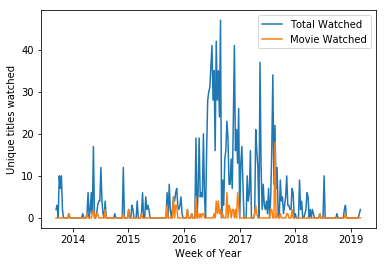

In [97]:
plt.plot(watched_cnt.index, watched_cnt.values, label='Total Watched')
plt.plot(movie_sum.index, movie_sum.values, label='Movie Watched')
plt.xlabel('Week of Year')
plt.ylabel('Unique titles watched')
plt.legend()
plt.show()